https://wiki.thebiogrid.org/doku.php/biogrid_tab_version_2.0
http://pages.cs.wisc.edu/~legault/writeup-776.pdf

In [3]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.multitest as sm

In [97]:
data = pd.read_table("BIOGRID-ORGANISM-Homo_sapiens-3.5.182.tab2.txt", low_memory = False)
# data = pd.read_table("BIOGRID-ORGANISM-Saccharomyces_cerevisiae_S288c-3.5.182.tab2.txt", low_memory = False)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [98]:
data.head()

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,Pubmed ID,Organism Interactor A,Organism Interactor B,Throughput,Score,Modification,Phenotypes,Qualifications,Tags,Source Database
0,103,6416,2318,112315,108607,-,-,MAP2K4,FLNC,JNKK|JNKK1|MAPKK4|MEK4|MKK4|PRKMK4|SAPKK-1|SAP...,...,9006895,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
1,117,84665,88,124185,106603,-,-,MYPN,ACTN2,CMD1DD|CMH22|MYOP|RCM4,...,11309420,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
2,183,90,2339,106605,108625,-,-,ACVR1,FNTA,ACTRI|ACVR1A|ACVRLK2|ALK2|FOP|SKR1|TSRI,...,8599089,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
3,278,2624,5371,108894,111384,-,-,GATA2,PML,DCML|IMD21|MONOMAC|NFE1B,...,10938104,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
4,418,6118,6774,112038,112651,RP4-547C9.3,-,RPA2,STAT3,REPA2|RP-A p32|RP-A p34|RPA32,...,10875894,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID


In [99]:
val = data.copy()
val.set_index("Experimental System Type", inplace = True)
val = val.filter(items = ["Official Symbol Interactor A", "Official Symbol Interactor B", "Pubmed ID"])
val = val.filter(like = "physical", axis = 0)
# val = val.filter(like = "genetic", axis = 0)
print(val.size)
val.head()

1587279


,Official Symbol Interactor A,Official Symbol Interactor B,Pubmed ID
Experimental System Type,,,
physical,MAP2K4,FLNC,9006895
physical,MYPN,ACTN2,11309420
physical,ACVR1,FNTA,8599089
physical,GATA2,PML,10938104
physical,RPA2,STAT3,10875894


In [116]:
graph = nx.from_pandas_edgelist(val.head(30), "Official Symbol Interactor A", "Official Symbol Interactor B", create_using=nx.DiGraph)

/usr/local/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


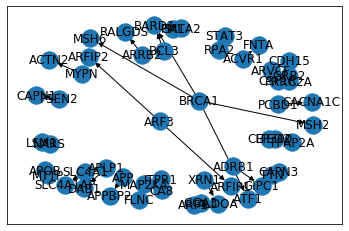

In [117]:
nx.draw_networkx(graph)

In [118]:
adj = nx.to_pandas_adjacency(graph)

In [119]:
adj

,MAP2K4,FLNC,MYPN,ACTN2,ACVR1,FNTA,GATA2,PML,RPA2,STAT3,...,ARVCF,CDH15,PCBD1,CACNA1C,PSEN2,CAPN1,CAPN3,TTN,ITPR1,CA8
MAP2K4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FLNC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MYPN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACTN2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACVR1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FNTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GATA2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PML,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RPA2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
STAT3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
# Implementation of distance function
a = [[0,1,1], [0,0,0], [0,0,0]]
b = [[0,0,0], [1,0,1], [0,0,0]]
c = [[0,0,0], [0,0,0], [1,1,0]]
d = [[0,0,0], [1,0,0], [1,0,0]]
e = [[0,0,0], [1,0,0], [0,1,0]]

def attributes(x):
    """
    Returns [number of source nodes, number of outgoing edges per node...]
    which is equivalent to d(x, 0) for connectivity matrix x
    """
    n = len(x)
    
    # Initialize with counter of source nodes
    result = [0]
    
    # Increment counter for number of source nodes
    for j in range(n):
        for i in range(n):
            if x[i][j] != 0:
                break
            elif i == n - 1:
                result[0] += 1
    
    # Append sorted list of number of outgoing edges per node
    result.extend(sorted([sum(row) for row in x]))
    
    return result

print(attributes(a))
print(attributes(b))
print(attributes(c))
print(attributes(d))
print(attributes(e))

[1, 0, 0, 2]
[1, 0, 0, 2]
[1, 0, 0, 2]
[2, 0, 1, 1]
[1, 0, 1, 1]


In [121]:
graph.nodes()

NodeView(('MAP2K4', 'FLNC', 'MYPN', 'ACTN2', 'ACVR1', 'FNTA', 'GATA2', 'PML', 'RPA2', 'STAT3', 'ARF1', 'GGA3', 'ARF3', 'ARFIP2', 'ARFIP1', 'XRN1', 'ALDOA', 'APP', 'APPBP2', 'APLP1', 'DAB1', 'CITED2', 'TFAP2A', 'EP300', 'APOB', 'MTTP', 'ARRB2', 'RALGDS', 'CSF1R', 'GRB2', 'PRRC2A', 'LSM1', 'NARS', 'SLC4A1', 'SLC4A1AP', 'BCL3', 'BARD1', 'ADRB1', 'GIPC1', 'BRCA1', 'ATF1', 'MSH2', 'MSH6', 'ARVCF', 'CDH15', 'PCBD1', 'CACNA1C', 'PSEN2', 'CAPN1', 'CAPN3', 'TTN', 'ITPR1', 'CA8'))

In [122]:
# Discover all subgraphs of graph
subgraphs = list(nx.weakly_connected_component_subgraphs(graph))

In [123]:
from collections import defaultdict 

In [124]:
subgraphs_n = defaultdict(list)

In [125]:
# Categorize subgraphs into number of nodes
for subgraph in subgraphs:
    subgraphs_n[nx.number_of_nodes(subgraph)].append(subgraph)

In [126]:
subgraphs_n

defaultdict(list,
            {2: [<networkx.classes.digraph.DiGraph at 0x1a388b7860>,
             3: [<networkx.classes.digraph.DiGraph at 0x1a388a7b70>,
             6: [<networkx.classes.digraph.DiGraph at 0x1a388a7b38>]})